# 1D signal processing

## 1. Images as 2D signals

### 1.1 Image file operations. Color and grayscale images

In [23]:
!pip install scikit-image
!pip install matplotlib

In [24]:
image_path_house = r'resources/2D/house.png'
image_path_lena = r'resources/2D/lena.png'
image_path_livestock = r'resources/2D/livestock.jpeg'
image_path_sunset = r'resources/2D/sunset.png'
image_path_flag = r'resources/2D/flag.jpg'
image_path_night = r'resources/2D/night.jpg'

Read and save an image

In [25]:
from skimage import io

image = io.imread(image_path_house)

print(type(image))
print(image.shape)

output_path = 'output/saved_image.png'
io.imsave(output_path, image)

<class 'numpy.ndarray'>
(200, 200, 3)


Display an image

Visualize color channels

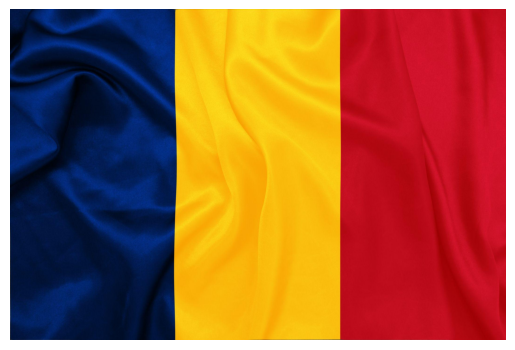

R Red:


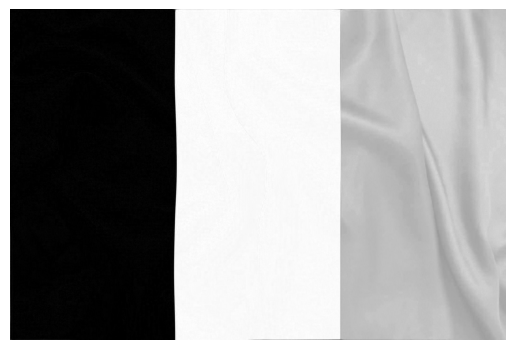

G Green:


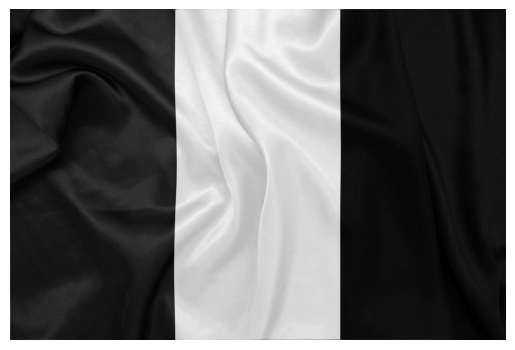

B Blue:


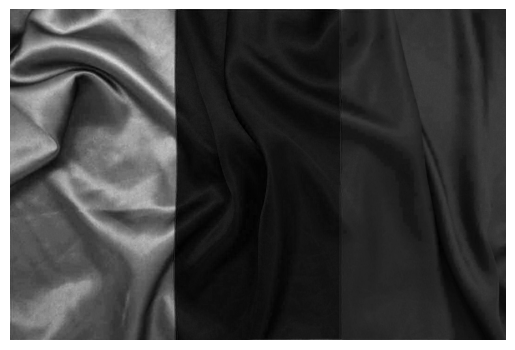

In [26]:
import matplotlib.pyplot as plt

image = io.imread(image_path_flag)

plt.imshow(image)
plt.axis("off")
plt.show()

print('R Red:')
plt.imshow(image[:, :, 0],cmap="gray")
plt.axis("off")
plt.show()

print('G Green:')
plt.imshow(image[:, :, 1], cmap="gray")
plt.axis("off")
plt.show()

print('B Blue:')
plt.imshow(image[:, :, 2], cmap="gray")
plt.axis("off")
plt.show()

Convert RGB to grayscale:

image.shape:  (1414, 2121, 3)


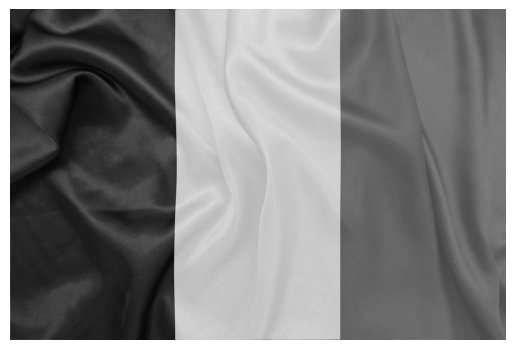

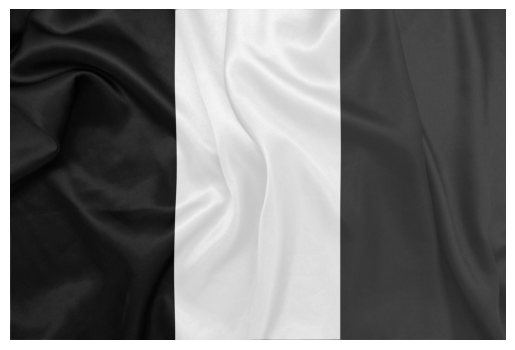

In [27]:
from skimage import color
import numpy as np

image = io.imread(image_path_flag)

print('image.shape: ', image.shape)
average_chanels_image = np.mean(image, axis=2) # axis=2 inseamna ca facem media pe canale (ultimul axis)
plt.imshow(average_chanels_image, cmap="gray")
plt.axis("off")
plt.show()

 
gray_image = color.rgb2gray(image) # converteste la grayscale folosind o formula mai complexa
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.show()

* Do the images look the same?
* What should be doen for the manual impleemntation to match the skimage implementation?

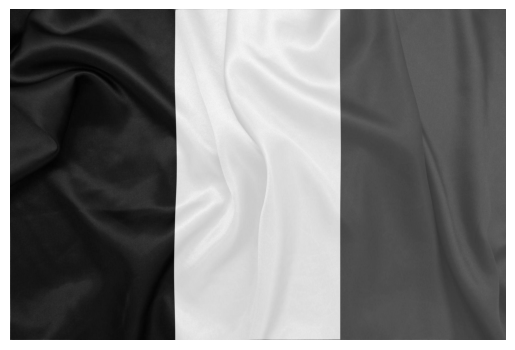

In [28]:
# ...
manual_gray_image = None
manual_gray_image = ( 0.299 * image[: ,: ,0] + 0.6 * image[:,:,1] + 0.114 * image[:,:,2]) 
plt.imshow(manual_gray_image, cmap="gray")
plt.axis("off")
plt.show()

Visualize the range of values

0.0005654901960784314
0.6922050980392157
0
189


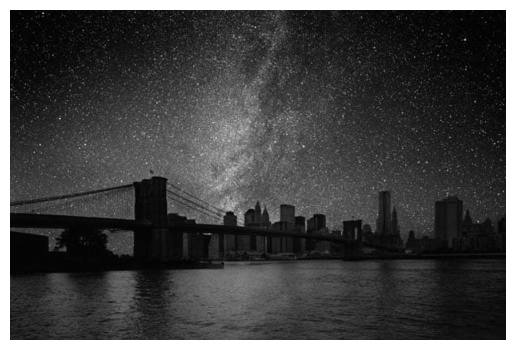

In [29]:
image = io.imread(image_path_night)
gray_image = color.rgb2gray(image)

print(np.min(gray_image))
print(np.max(gray_image))

print(np.min(image))
print(np.max(image))

plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.show()

0
176


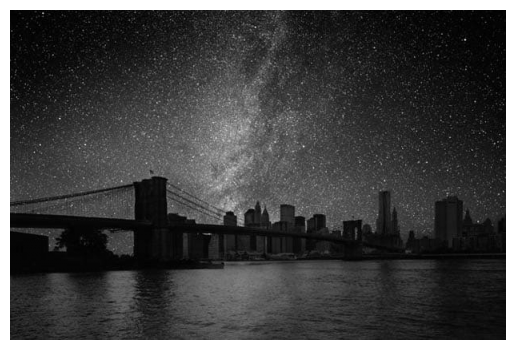

In [30]:
gray_image = 255 * gray_image
gray_image = np.uint8(gray_image)
print(np.min(gray_image))
print(np.max(gray_image))
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.show()

* How does plt.imshow() know to display both floating point [0, 1] numbers and uint8 {0, ... 255}?
* Is the plotted image really in its real range? Consult [plt.imshow() documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

0
176


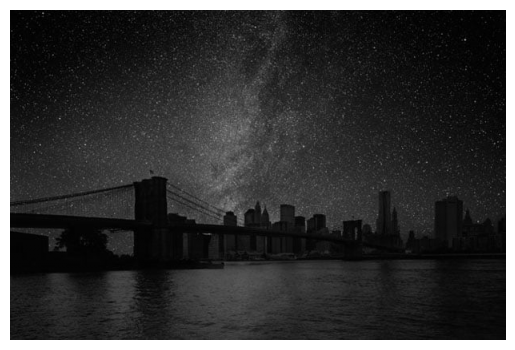

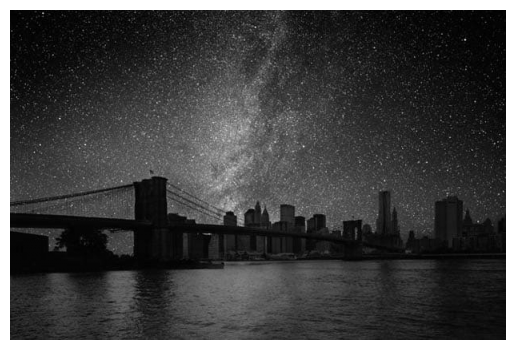

In [31]:
print(np.min(gray_image))
print(np.max(gray_image))
plt.imshow(gray_image, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()
plt.imshow(gray_image, cmap="gray")
plt.axis("off")
plt.show()

### 1.2 Bit depth. Quantization

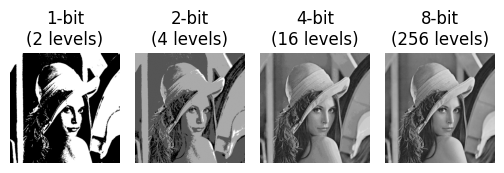

In [32]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np

image = io.imread(image_path_lena)
gray = color.rgb2gray(image)

def quantize_bits(img, n_bits):
    levels = 2 ** n_bits
    q = img * (levels - 1) # get the image in [0,levels-1] interval
    q = np.floor(q + 0.5) # aproximate to the nearest integer -> image in {0, 1, ... levels-1}
    q /= (levels-1) # get the image back in [0, 1]
    #q = np.floor(img * (levels - 1) + 0.5) / (levels - 1)
    return q

bit_depths = [1, 2, 4, 8]  # only these depths


for i, b in enumerate(bit_depths, start=2):
    q_img = quantize_bits(gray, b)
    plt.subplot(1, 5, i)
    plt.imshow(q_img, cmap="gray", vmin=0, vmax=1)
    plt.title(f"{b}-bit\n({2**b} levels)")
    plt.axis("off")

plt.tight_layout()
plt.show()

### 1.3 Thresholding

$$
q(x) =
\begin{cases}
0 & \text{if } x < T \\
1 & \text{if } x \geq T
\end{cases}
$$

Threshold an image by a chosen threshold

30
255
False
True


<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\vasid\AppData\Local\Temp\ipykernel_7052\372776923.py:1: SyntaxWarning: invalid escape sequence '\E'
  image = io.imread('D:\ETTI-AI_SS\day_3\WhatsApp Image 2025-09-18 at 19.35.23_dcbca58b.jpg')


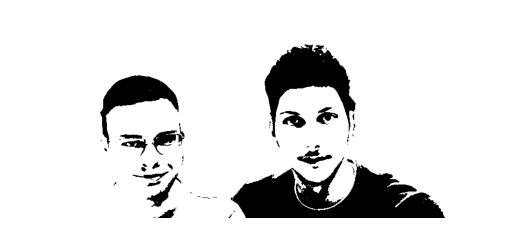

In [45]:
image = io.imread('D:\ETTI-AI_SS\day_3\WhatsApp Image 2025-09-18 at 19.35.23_dcbca58b.jpg')
gray = color.rgb2gray(image)

print(np.min(image))
print(np.max(image))

T = 0.5
gray_thresholded = gray > T

print(np.min(gray_thresholded))
print(np.max(gray_thresholded))

plt.imshow(gray_thresholded, cmap="gray")
plt.axis("off")
plt.show()

Semantic segmentation
 * segemnting objects
 * a frequent task for ML models
 * is it possible by finding  athreshold?

0
255


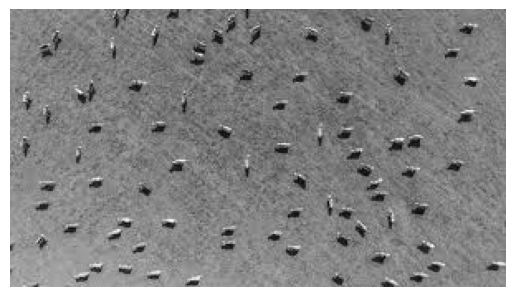

False
True


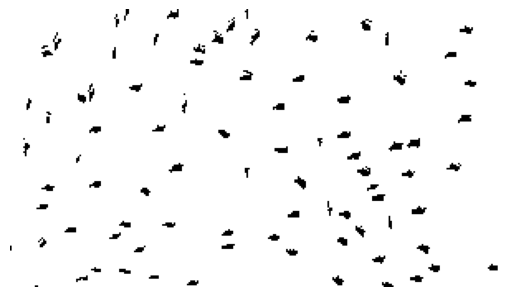

In [34]:
image = io.imread(image_path_livestock)
gray = color.rgb2gray(image)

print(np.min(image))
print(np.max(image))

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

T = 0.27 # find a threshold by trial and error
gray_thresholded = gray > T

print(np.min(gray_thresholded))
print(np.max(gray_thresholded))

plt.imshow(gray_thresholded, cmap="gray")
plt.axis("off")
plt.show()

Color-based segemntation: find a combination of parameters to segemnt the house (the bircks) out of house.png image


20
238


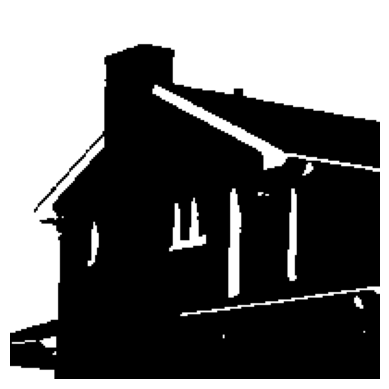

R Red:


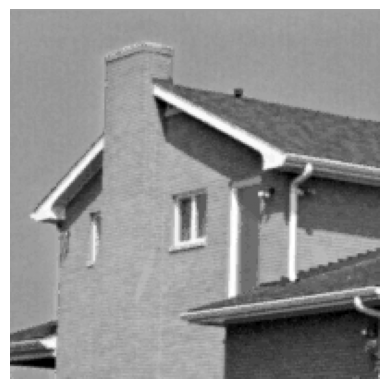

G Green:


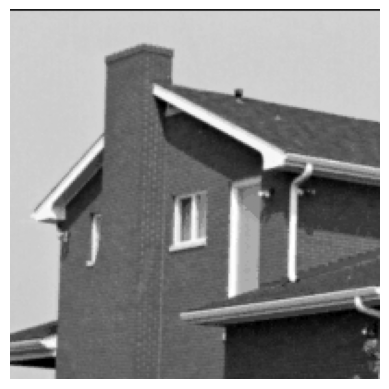

B Blue:


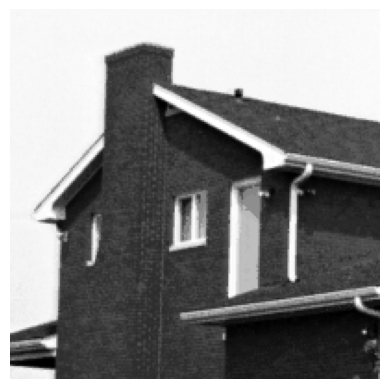

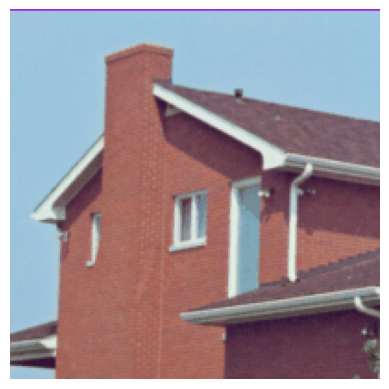

In [35]:
image = io.imread(image_path_house)

print(np.min(image))
print(np.max(image))

T_red = 150 # find a value
T_green = 30 # find a value 
T_blue = 150 # find a value

image_thresholded = (image[:, :, 0] > T_red) & (image[:, :, 1] > T_green) & (image[:, :, 2] > T_blue)
# CEL MAI MULT ROSU E IN VERDEEEEE

plt.imshow(image_thresholded, cmap="gray")
plt.axis("off")
plt.show()

print('R Red:')
plt.imshow(image[:, :, 0],cmap="gray")
plt.axis("off")
plt.show()

print('G Green:')
plt.imshow(image[:, :, 1], cmap="gray")
plt.axis("off")
plt.show()

print('B Blue:')
plt.imshow(image[:, :, 2], cmap="gray")
plt.axis("off")
plt.show()

plt.imshow(image)
plt.axis("off")
plt.show()

### 1.4 Color spaces

#### HSV = Hue Saturation Value

![HSV](resources/2D/HSV.png)


H range:  0.0 0.9969135802469136
S range:  0.0 1.0
V range:  0.0 1.0


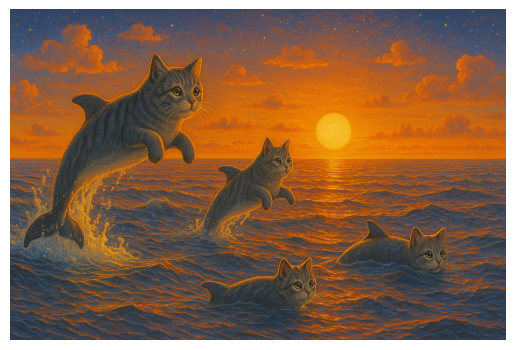

H Hue


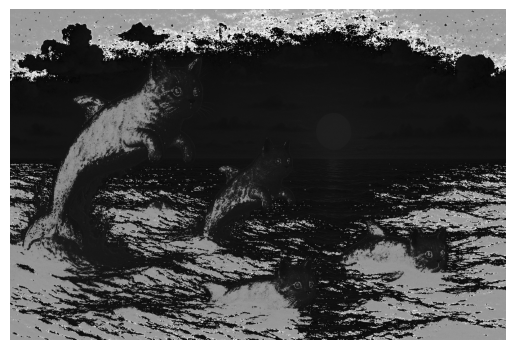

S Saturation


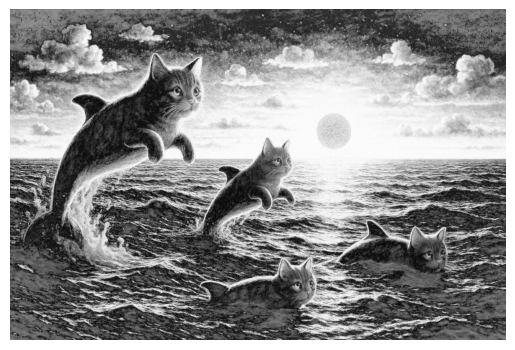

V Value


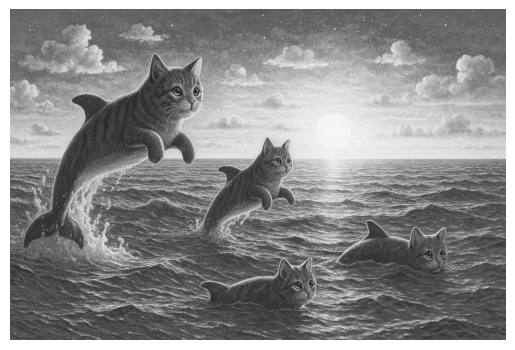

In [36]:
from skimage import io, color, img_as_float

image = img_as_float(io.imread(image_path_sunset)) # read the image and transform to float

hsv = color.rgb2hsv(image) # rgb2hsv operates on floats

H, S, V = hsv[...,0], hsv[...,1], hsv[...,2]

print('H range: ', np.min(H), np.max(H)) # maps to [0°, 360°]
print('S range: ', np.min(S), np.max(S))
print('V range: ', np.min(V), np.max(V))

plt.imshow(image)
plt.axis("off")
plt.show()
print('H Hue')
plt.imshow(H, cmap='gray')
plt.axis("off")
plt.show()
print('S Saturation')
plt.imshow(S, cmap='gray')
plt.axis("off")
plt.show()
print('V Value')
plt.imshow(V, cmap='gray')
plt.axis("off")
plt.show()

#### lab #a

![HSV](resources/2D/Lab.png)

L range:  0.0 0.9969135802469136
a range:  0.0 1.0
b range:  0.0 1.0


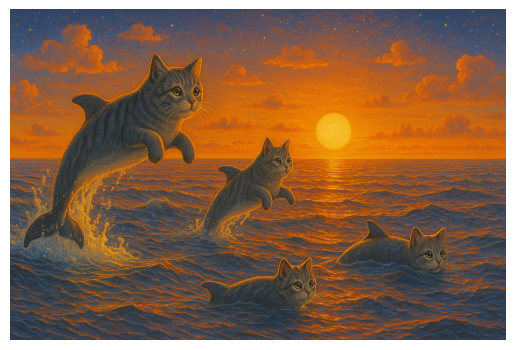

L 


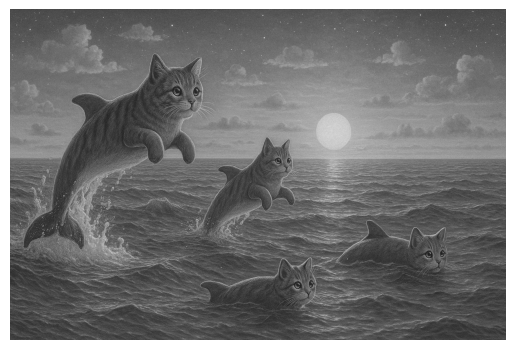

a


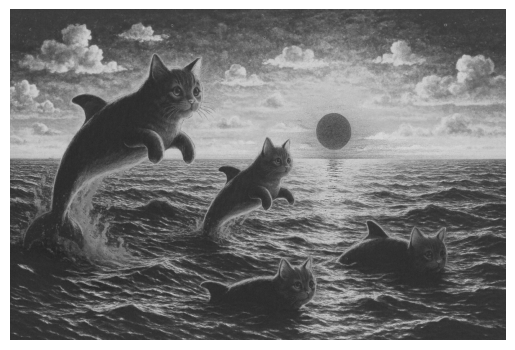

b


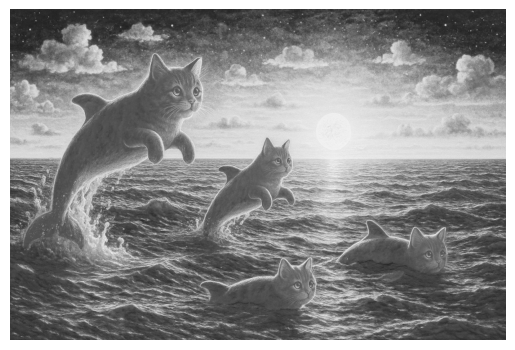

In [37]:
from skimage import io, color, img_as_float

image = img_as_float(io.imread(image_path_sunset)) # read the image and transform to float

lab = color.rgb2lab(image) # rgb2hsv operates on floats

L, a, b = lab[...,0], lab[...,1], lab[...,2]

print('L range: ', np.min(H), np.max(H))
print('a range: ', np.min(S), np.max(S))
print('b range: ', np.min(V), np.max(V))

plt.imshow(image)
plt.axis("off")
plt.show()
print('L ')
plt.imshow(L, cmap='gray')
plt.axis("off")
plt.show()
print('a')
plt.imshow(a, cmap='gray')
plt.axis("off")
plt.show()
print('b')
plt.imshow(b, cmap='gray')
plt.axis("off")
plt.show()

### 1.5 Histograms

#### Grayscale histogram

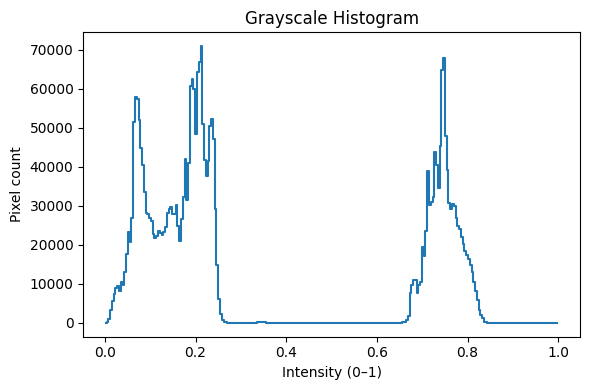

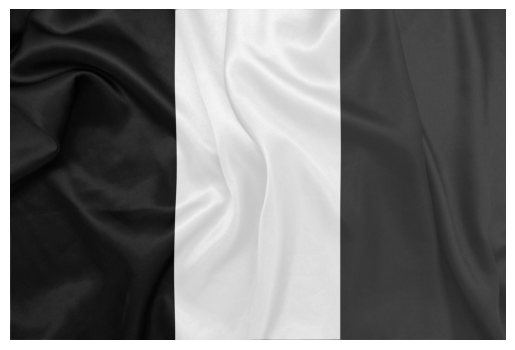

In [38]:
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt

image = img_as_float(io.imread(image_path_flag))

gray = color.rgb2gray(image)

bins = 256
counts_g, bin_edges_g = np.histogram(gray, bins=bins, range=(0.0, 1.0))
bin_centers_g = 0.5 * (bin_edges_g[:-1] + bin_edges_g[1:])

plt.figure(figsize=(6,4))
plt.plot(bin_centers_g, counts_g, drawstyle="steps-mid")
plt.title("Grayscale Histogram")
plt.xlabel("Intensity (0–1)")
plt.ylabel("Pixel count")
plt.tight_layout()
plt.show()
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.show()

#### Color histribution histogram

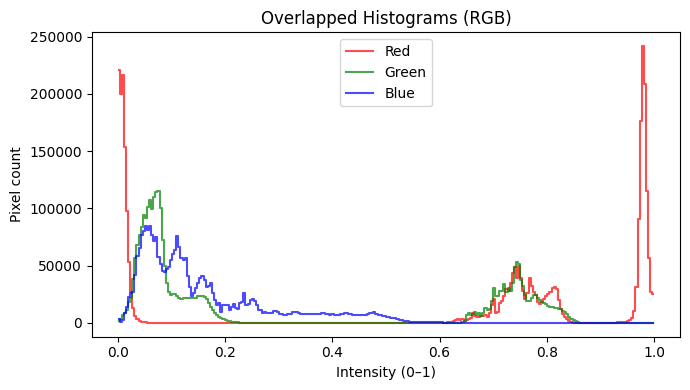

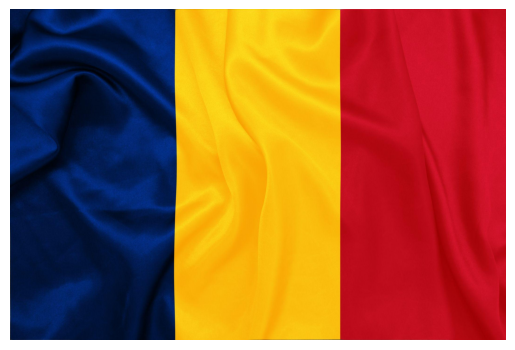

R Red:


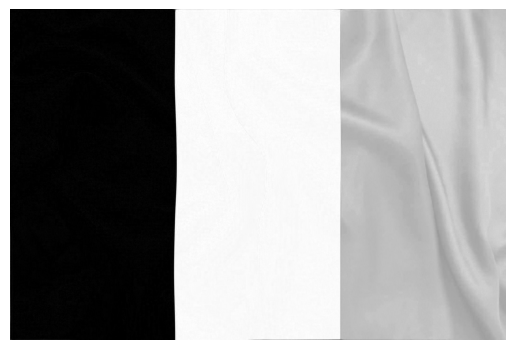

G Green:


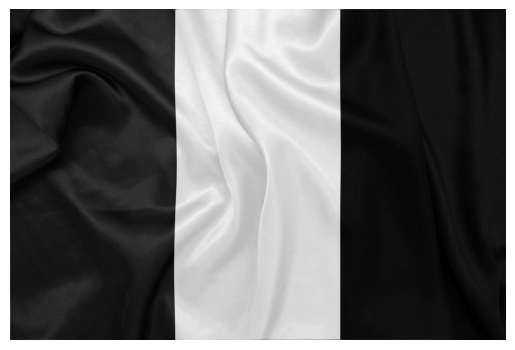

B Blue:


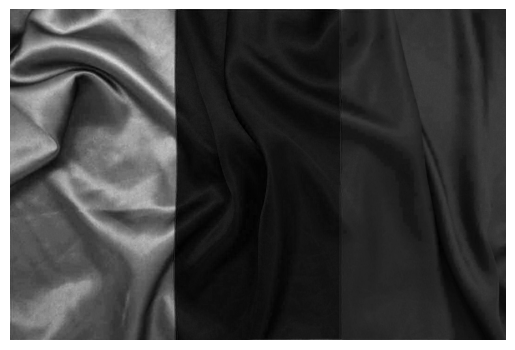

In [39]:
R = image[..., 0]
G = image[..., 1]
B = image[..., 2]

def hist01(channel, bins=256):
    c, e = np.histogram(channel, bins=bins, range=(0.0, 1.0))
    return 0.5*(e[:-1] + e[1:]), c

xR, hR = hist01(R, bins)
xG, hG = hist01(G, bins)
xB, hB = hist01(B, bins)

plt.figure(figsize=(7,4))
plt.plot(xR, hR, drawstyle="steps-mid", label="Red",   color="r", alpha=0.7)
plt.plot(xG, hG, drawstyle="steps-mid", label="Green", color="g", alpha=0.7)
plt.plot(xB, hB, drawstyle="steps-mid", label="Blue",  color="b", alpha=0.7)

plt.title("Overlapped Histograms (RGB)")
plt.xlabel("Intensity (0–1)")
plt.ylabel("Pixel count")
plt.legend()
plt.tight_layout()
plt.show()

plt.imshow(image)
plt.axis("off")
plt.show()

print('R Red:')
plt.imshow(image[:, :, 0],cmap="gray")
plt.axis("off")
plt.show()

print('G Green:')
plt.imshow(image[:, :, 1], cmap="gray")
plt.axis("off")
plt.show()

print('B Blue:')
plt.imshow(image[:, :, 2], cmap="gray")
plt.axis("off")
plt.show()

### 1.6 Convolution

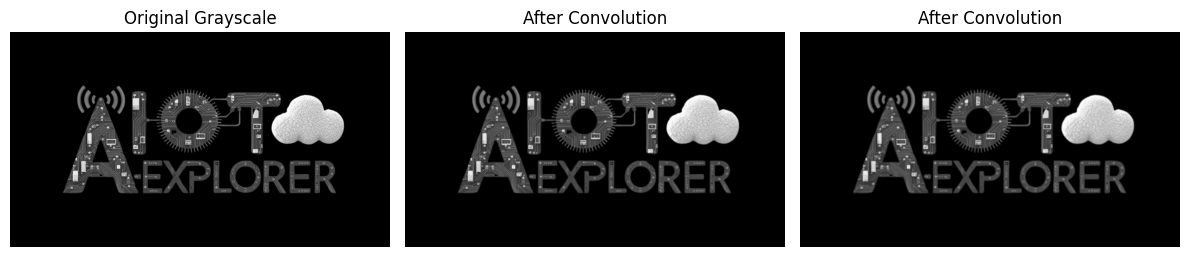

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.signal import convolve2d

image = io.imread(r'D:\ETTI-AI_SS\day_3\aiot.jpg')
gray = color.rgb2gray(image)

kernel = np.array([[ 1/9, 1/9, 1/9], #practic inmultim fiecare element cu 1/9 si dupa le adunam deci practic e media
                   [ 1/9,  1/9, 1/9],  # ca un fel de filtru de smoothing
                   [ 1/9, 1/9, 1/9]]) # daca pun un 1/18 in loc de un element din matrice, atunci imaginea devine mai intunecata

convolved = convolve2d(gray, kernel, mode="same", boundary="symm")
convolved_bis = convolve2d(convolved, kernel, mode="same", boundary="symm")

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(convolved, cmap="gray")
plt.title("After Convolution")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(convolved_bis, cmap="gray")
plt.title("After Convolution")
plt.axis("off")

plt.tight_layout()
plt.show()


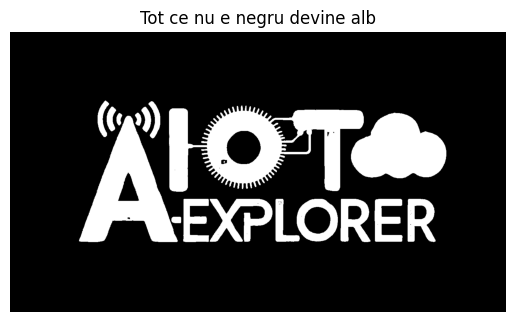

In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Citește imaginea (calea ta absolută)
image = io.imread(r'D:\ETTI-AI_SS\day_3\aiot.jpg')

# Dacă imaginea e color, convertește la grayscale
if image.ndim == 3:
    from skimage import color
    gray = color.rgb2gray(image)
else:
    gray = image

# Binarizează: tot ce nu e negru devine alb
# Pragul 0.05 e ales pentru a considera "aproape negru" ca negru
binary = np.where(gray > 0.05, 1.0, 0.0)

plt.imshow(binary_inverted, cmap='gray')
plt.title("Tot ce nu e negru devine alb")
plt.axis("off")
plt.show()

### 1.7 Filtering

#### HPF (High Pass filter)
 * What is the 'high frequency' information that passes?

#### LPF (Low Pass filter)
 * What is the 'low frequency' information that passes?

#### Derivator and Smoothing filters

derivator filters (HPF):
 * coefficients sum up to 0

smoothing filters (LPF):
 * coefficients sum up to 1
 * all coefficients are positive

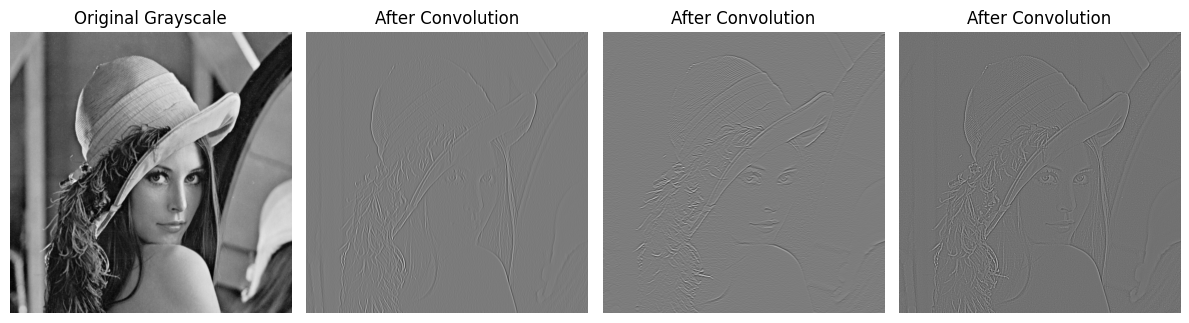

In [41]:
image = io.imread(image_path_lena)
gray = color.rgb2gray(image)

kernel_1 = np.array([[ -1, 2, -1],  
                     [ -1, 2, -1],    #suma mereu trebuie sa fie 0
                     [ -1, 2, -1]])   

kernel_2 = np.array([[ -1, -1, -1],
                     [ 2,   2, 2],    
                     [ -1, -1, -1]])

kernel_3 = np.array([[ -1, -1, -1],
                   [ -1,  8, -1],       # suma mereu trebuie sa fie 0
                   [ -1, -1, -1]])

convolved_1 = convolve2d(gray, kernel_1, mode="same", boundary="symm")
convolved_2 = convolve2d(gray, kernel_2, mode="same", boundary="symm")
convolved_3 = convolve2d(gray, kernel_3, mode="same", boundary="symm")

plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
plt.imshow(gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(convolved_1, cmap="gray")
plt.title("After Convolution")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(convolved_2, cmap="gray")
plt.title("After Convolution")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(convolved_3, cmap="gray")
plt.title("After Convolution")
plt.axis("off")

plt.tight_layout()
plt.show()

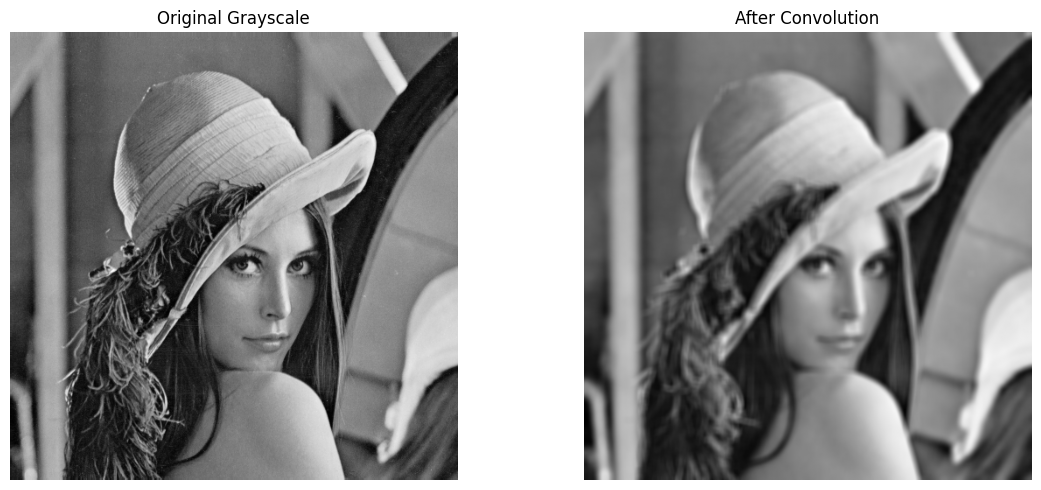

In [42]:
image = io.imread(image_path_lena)
gray = color.rgb2gray(image)

kernel_size = 8
kernel = 1/(kernel_size**2) * np.ones((kernel_size, kernel_size))

convolved = convolve2d(gray, kernel, mode="same", boundary="symm")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(convolved, cmap="gray")
plt.title("After Convolution")
plt.axis("off")

plt.tight_layout()
plt.show()

### 1.8 Fourier for images and filtering in frequency domain

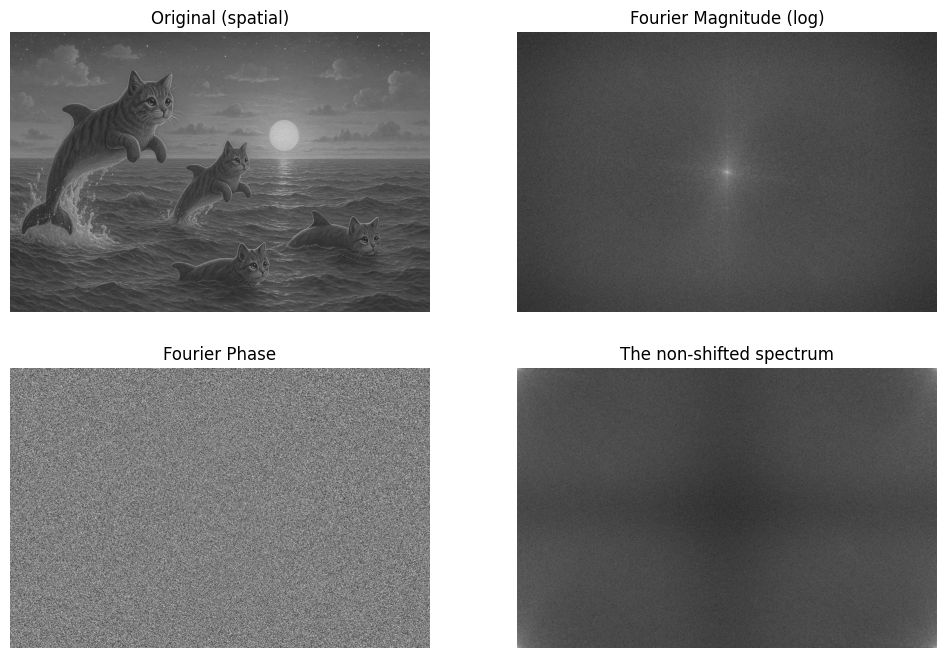

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float

img = io.imread(image_path_sunset)
if img.ndim == 3:
    img = color.rgb2gray(img)
img = img_as_float(img)

# FOURIER transform (forward)
F = np.fft.fft2(img)
# shift the spectrum - becuase zero frequency (DC component) is at the [0,0] corner of the array (mathematically) -> but we don't like that: we want it in the center
Fshift = np.fft.fftshift(F)

mag = np.log1p(np.abs(Fshift)) # magnitude spectrum
phase = np.angle(Fshift)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original (spatial)")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(mag, cmap='gray')
plt.title("Fourier Magnitude (log)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(phase, cmap='gray')
plt.title("Fourier Phase")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.title("The non-shifted spectrum")
plt.axis("off")

plt.show()




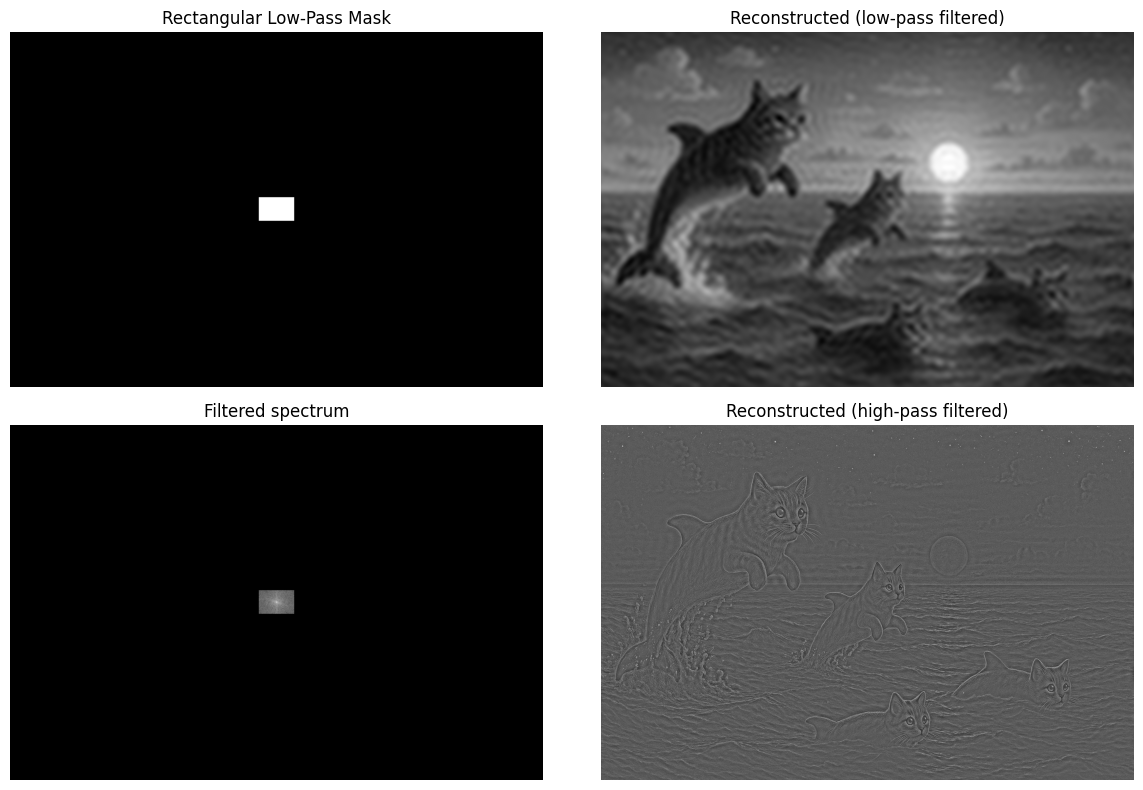

In [44]:
# create a RECTANGULAR LPF
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2 # because the spectrum is simetric

# chose where to cut frequency
half_h = crow // 15
half_w = ccol // 15


mask_LPF = np.zeros_like(Fshift, dtype=bool)
mask_LPF[crow - half_h : crow + half_h, ccol - half_w : ccol + half_w] = True
mask_HPF = ~mask_LPF # ~ is negation

Fshift_lp = np.zeros_like(Fshift) # create empty zeros base
Fshift_hp = np.zeros_like(Fshift) # create empdddty zeros base
Fshift_lp[mask_LPF] = Fshift[mask_LPF] # add the center values that passed the filter to that base
Fshift_hp[mask_HPF] = Fshift[mask_HPF]

# FOURIER transform (backwards)
F_ishift = np.fft.ifftshift(Fshift_lp) # re-shift
img_lp = np.fft.ifft2(F_ishift) # inverse Fourier
img_lp = np.real(img_lp) # select th ereal part: that is because hter si a small numeric noise that causes tiny imaginary parts (in theory, because the oriignal image was real, the reconstructed image should also be real)

# do that again for the HPF
F_ishift_hp = np.fft.ifftshift(Fshift_hp) # re-shift
img_hp = np.fft.ifft2(F_ishift_hp) # inverse Four=ier
img_hp = np.real(img_hp) # select th ereal part: that is because hter si a small numeric noise that causes tiny imaginary parts (in theory, because the oriignal image was real, the reconstructed image should also be real)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(mask_LPF, cmap='gray')
plt.title("Rectangular Low-Pass Mask")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_lp, cmap='gray')
plt.title("Reconstructed (low-pass filtered)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(np.log1p(np.abs(Fshift_lp)), cmap='gray')
plt.title("Filtered spectrum")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img_hp, cmap='gray')
plt.title("Reconstructed (high-pass filtered)")
plt.axis("off")

plt.tight_layout()
plt.show()